In [2]:
import numpy as np
import pandas as pd
from calendar import month_name

Presentación

    Contexto:

    Hipótesis:

Descripción y resumen de los datasets (numero de filas, maximos, minimos, promedios, etc)

In [3]:
siniestros = pd.read_csv("historico_siniestros_bogota_d.c_.csv",sep = ',', encoding='utf-8-sig')
siniestros.head()

filas, columnas = siniestros.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)


Cantidad de filas: 199146
Cantidad de columnas: 16


In [4]:
# Convertir la fecha en la primera base de datos al formato de año y mes
siniestros['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(siniestros['FECHA_OCURRENCIA_ACC'])
siniestros['Año'] = siniestros['FECHA_OCURRENCIA_ACC'].dt.year
siniestros['Mes'] = siniestros['FECHA_OCURRENCIA_ACC'].dt.month_name()

meses_ingles = list(month_name[1:])
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

traductor_meses = dict(zip(meses_ingles, meses_espanol))
siniestros['Mes'] = siniestros['Mes'].map(traductor_meses)


filas, columnas = siniestros.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)


Cantidad de filas: 199146
Cantidad de columnas: 18


In [5]:
temperatura = pd.read_csv("osb_temperatura.csv",sep = ';', encoding='latin-1')
temperatura.head()

filas, columnas = temperatura.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

Cantidad de filas: 192
Cantidad de columnas: 6


In [6]:
tem_meta = pd.read_csv("metadato_temperatura.csv",sep = ';', encoding='latin-1')
tem_meta

METADATO  \
0               Serie de tiempo desde   
1            Definición del indicador   
2                           Utilidad    
3                  Unidad de medición   
4                        Periodicidad   
5                               Meta    
6     Fuente de Información Numerador   
7   Fuente de Información Denominador   
8                            año/Mes    
9                                  °C   
10                               ENOS   
11                 Formula de cálculo   

                                          DESCRIPCION  
0                                                2007  
1   Se refiere al grado de calor específico del ai...  
2   Monitorear las temperaturas máximas, mínimas y...  
3                                                  °C  
4                                               Anual  
5   Formular el componente de Salud Ambiental del ...  
6   Secretaría Distrital de Ambiente, Red de Monit...  
7                                                 NaN  
8           Periodo de recolección de la información   
9   El grado Celsius (en símbolo en °C), es la uni...  
10  El Niño-Oscilación del Sur (ENOS) es un fenóme...  
11  Temperatura promedio: (Temperatura promedio ho...

In [7]:
# Combinar los conjuntos de datos por año y mes con inner join
df_combinado = pd.merge(siniestros, temperatura, on=['Año', 'Mes'],how='inner')

filas, columnas = df_combinado.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

columnas = df_combinado.columns

print("Listado de columnas:")
for columna in columnas:
    print(columna)

df_combinado.head(5)


Cantidad de filas: 199146
Cantidad de columnas: 22
Listado de columnas:
X
Y
OBJECTID
FORMULARIO
CODIGO_ACCIDENTE
FECHA_OCURRENCIA_ACC
ANO_OCURRENCIA_ACC
DIRECCION
GRAVEDAD
CLASE_ACC
LOCALIDAD
FECHA_HORA_ACC
LATITUD
LONGITUD
CIV
PK_CALZADA
Año
Mes
Temperatura Máxima
Temperatura Mínima
Temperatura promedio
Enos 


X         Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
0 -74.090924  4.693807         1  A000640275           4484660   
1 -74.111449  4.708986       447  A000605360           4483783   
2 -74.095896  4.605164       525  A000641101           4485996   
3 -74.074858  4.631468       548  A000640745           4485206   
4 -74.094911  4.687281       685  A000640391           4484772   

       FECHA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC                   DIRECCION  \
0 2017-06-12 00:00:00+00:00                2017  AV AVENIDA BOYACA-CL 79 02   
1 2017-06-03 00:00:00+00:00                2017              CL 80-KR 98 02   
2 2017-06-28 00:00:00+00:00                2017               CL 6-KR 27 02   
3 2017-06-17 00:00:00+00:00                2017              CL 41-KR 22 02   
4 2017-06-13 00:00:00+00:00                2017              KR 72-CL 72 02   

      GRAVEDAD CLASE_ACC  ...   LATITUD   LONGITUD         CIV  PK_CALZADA  \
0   SOLO DANOS    CHOQUE  ...  4.693807 -74.090924  10006772.0    221236.0   
1   SOLO DANOS    CHOQUE  ...  4.708986 -74.111449  10003679.0     20594.0   
2  CON HERIDOS    CHOQUE  ...  4.605164 -74.095896  14000671.0     54734.0   
3   SOLO DANOS    CHOQUE  ...  4.631468 -74.074858  13001712.0    193016.0   
4   SOLO DANOS    CHOQUE  ...  4.687281 -74.094911  10007526.0    221146.0   

    Año    Mes  Temperatura Máxima Temperatura Mínima Temperatura promedio  \
0  2017  Junio                  24                6,8                 14,6   
1  2017  Junio                  24                6,8                 14,6   
2  2017  Junio                  24                6,8                 14,6   
3  2017  Junio                  24                6,8                 14,6   
4  2017  Junio                  24                6,8                 14,6   

    Enos   
0  Neutro  
1  Neutro  
2  Neutro  
3  Neutro  
4  Neutro  

[5 rows x 22 columns]

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


features = ['Enos ','GRAVEDAD', 'CLASE_ACC', 'LOCALIDAD','Temperatura promedio']
data = df_combinado[features]

data = data.dropna()

label_encoder = LabelEncoder()
data['CLASE_ACC'] = label_encoder.fit_transform(data['CLASE_ACC'])
data['Enos '] = label_encoder.fit_transform(data['Enos '])


# Aplica la transformación
data['LOCALIDAD'] = label_encoder.fit_transform(data['LOCALIDAD'])

transformed_labels = data['LOCALIDAD'].unique()

transformed_labels_df = pd.DataFrame({'Localidad': label_encoder.inverse_transform(transformed_labels), 
                                      'Número de Transformación': transformed_labels})


X = data.drop('GRAVEDAD', axis=1)
y = data['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train['Temperatura promedio'] = X_train['Temperatura promedio'].str.replace(',', '.').astype(float)

X_test['Temperatura promedio'] = X_test['Temperatura promedio'].str.replace(',', '.').astype(float)


model = DecisionTreeClassifier(max_depth=10,min_samples_split=500,min_samples_leaf=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

             Localidad  Número de Transformación
0             ENGATIVA                         6
1         LOS MARTIRES                         9
2          TEUSAQUILLO                        16
3        SAN CRISTOBAL                        12
4       CIUDAD BOLIVAR                         5
5        PUENTE ARANDA                        10
6              USAQUEN                        18
7                 SUBA                        14
8              KENNEDY                         8
9             FONTIBON                         7
10            SANTA FE                        13
11      BARRIOS UNIDOS                         1
12                USME                        19
13           CHAPINERO                         4
14  RAFAEL URIBE URIBE                        11
15      ANTONIO NARINO                         0
16                BOSA                         2
17          TUNJUELITO                        17
18          CANDELARIA                         3
19             SUMAP

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize=(350, 50))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, fontsize=10)
plt.show()


Prueba 2

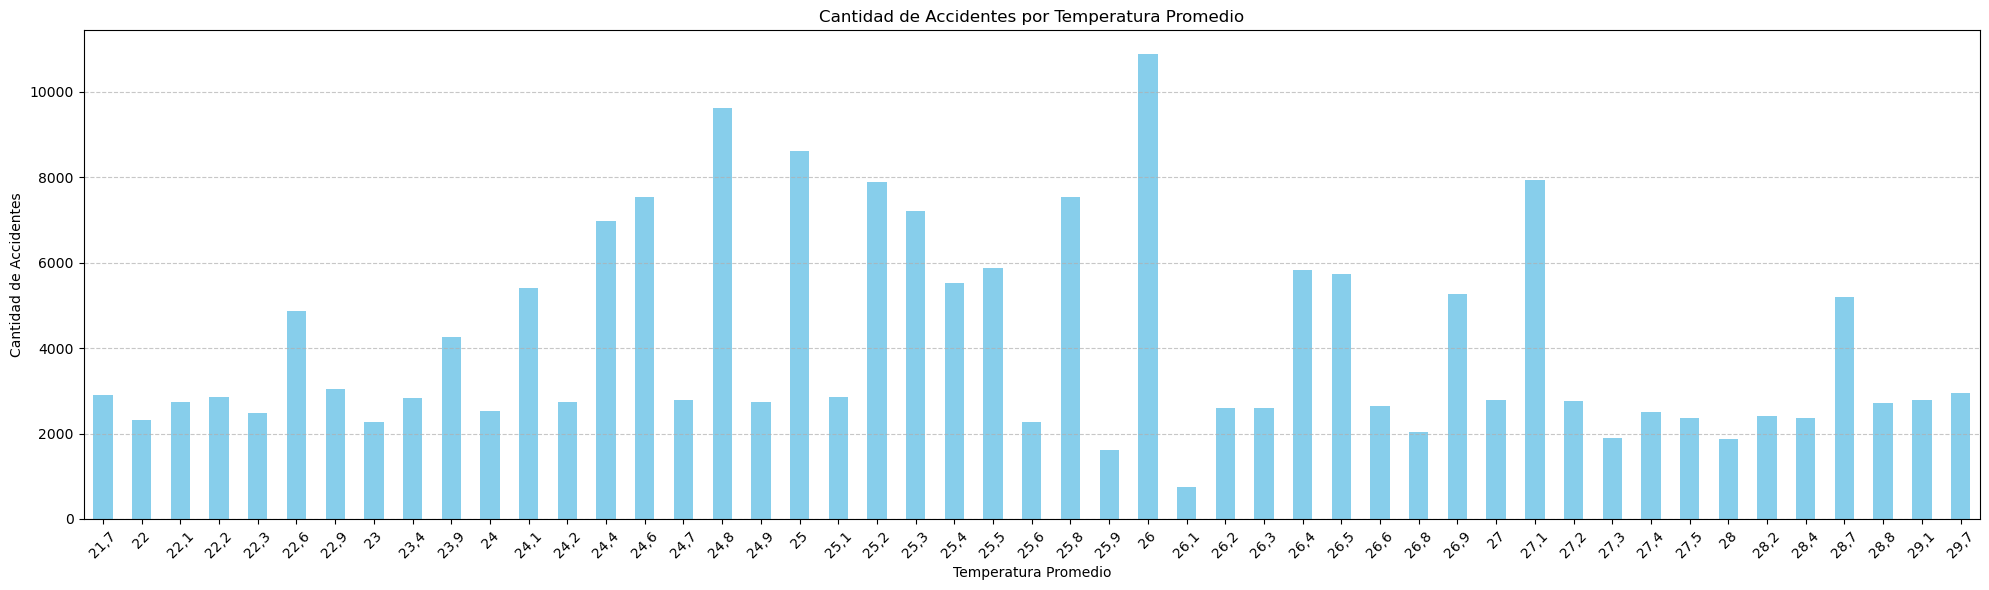

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


accidentes_por_temperatura = df_combinado.groupby('Temperatura Máxima').size()

# Graficar los recuentos de accidentes por temperatura promedio
plt.figure(figsize=(20, 6))
accidentes_por_temperatura.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Accidentes por Temperatura Promedio')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 2000x800 with 0 Axes>

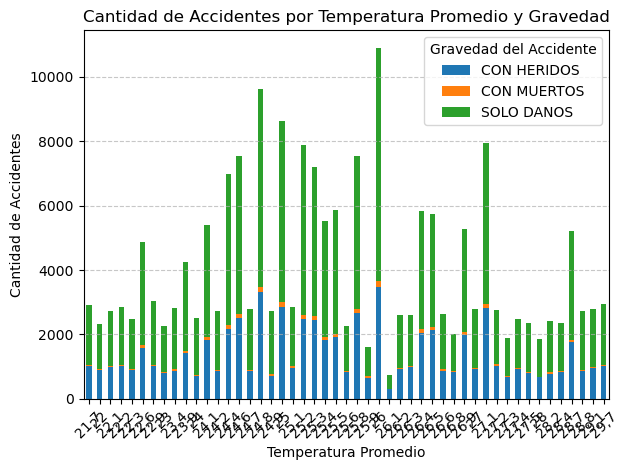

In [22]:

import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de accidentes por temperatura promedio y gravedad del accidente
accidentes_por_temperatura_gravedad = df_combinado.groupby(['Temperatura Máxima', 'GRAVEDAD']).size().unstack()

plt.figure(figsize=(20, 8))
accidentes_por_temperatura_gravedad.plot(kind='bar', stacked=True)
plt.title('Cantidad de Accidentes por Temperatura Promedio y Gravedad')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad del Accidente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


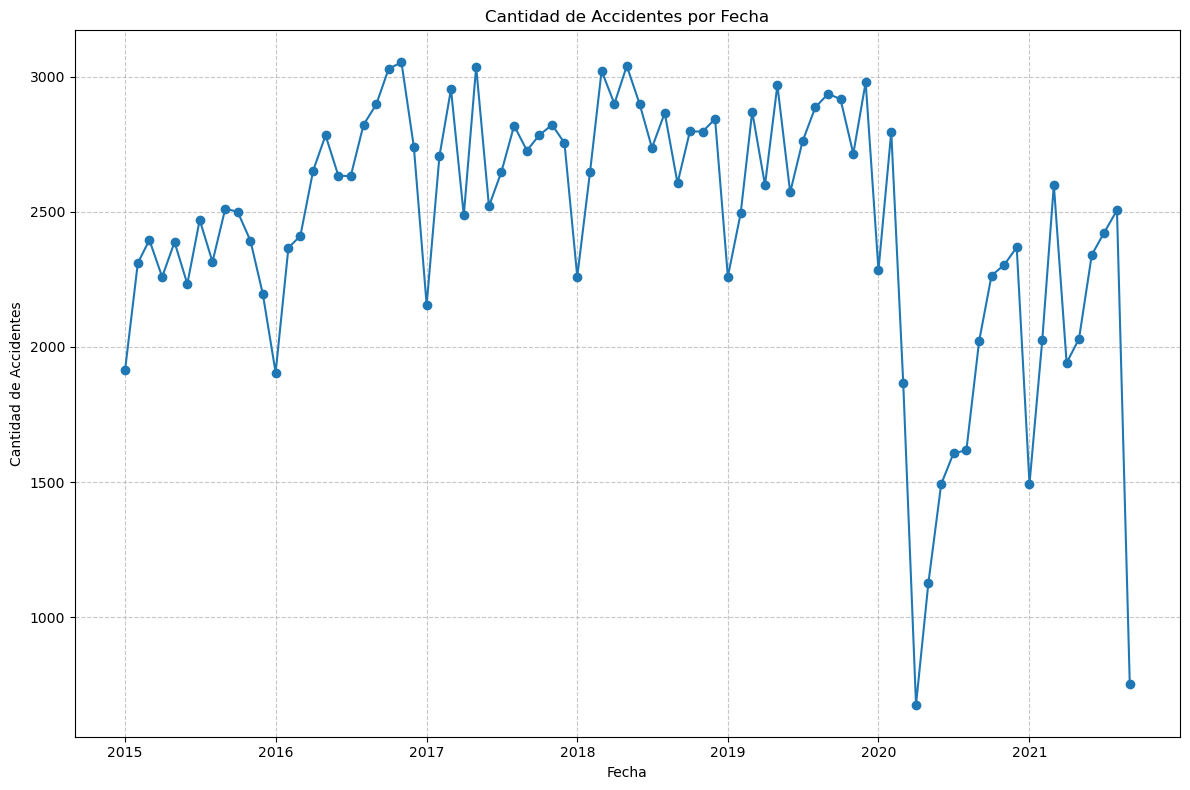

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_combinado


df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')

# Contar la cantidad de accidentes por fecha
accidentes_por_fecha = df.groupby('Fecha').size().reset_index(name='Cantidad de Accidentes')

plt.figure(figsize=(12, 8))
plt.plot(accidentes_por_fecha['Fecha'], accidentes_por_fecha['Cantidad de Accidentes'], marker='o')
plt.title('Cantidad de Accidentes por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accidentes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


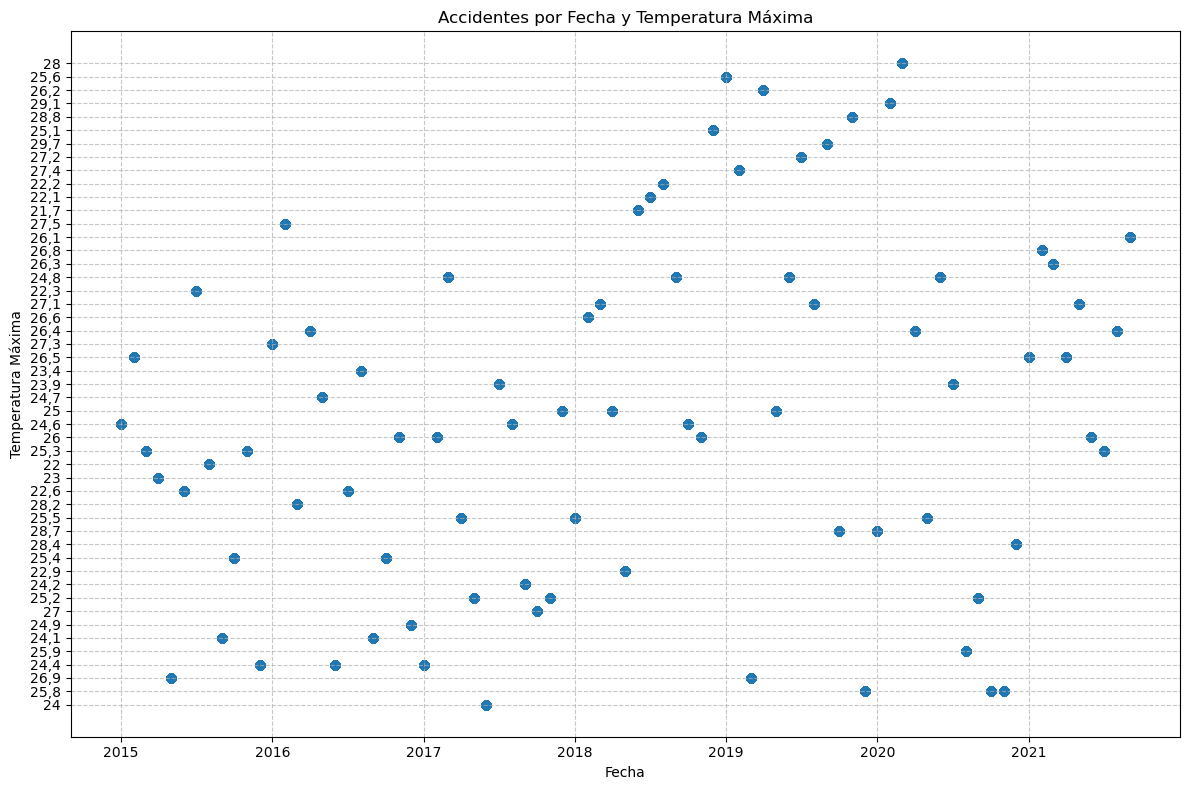

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


df = df_combinado
df['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(df['FECHA_OCURRENCIA_ACC'])

df['Fecha'] = pd.to_datetime(df['ANO_OCURRENCIA_ACC'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')

# Graficar los accidentes en un gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(df['Fecha'], df['Temperatura Máxima'], alpha=0.5)
plt.title('Accidentes por Fecha y Temperatura Máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


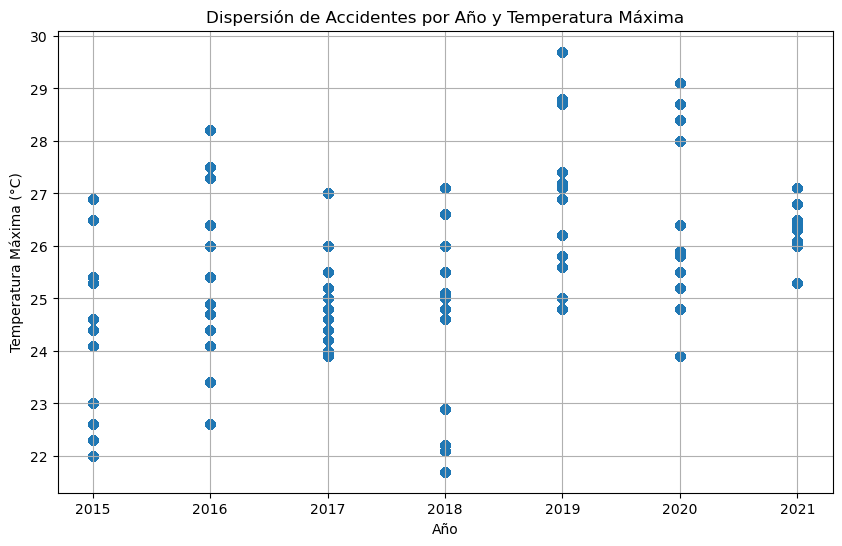

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

datos = df_combinado

plt.figure(figsize=(10, 6))
plt.scatter(datos['Año'], datos['Temperatura Máxima'], alpha=0.5)

plt.title('Dispersión de Accidentes por Año y Temperatura Máxima')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')

plt.grid(True)
plt.show()



Cantidad de datos en x: 199146
Cantidad de datos en y: 199146


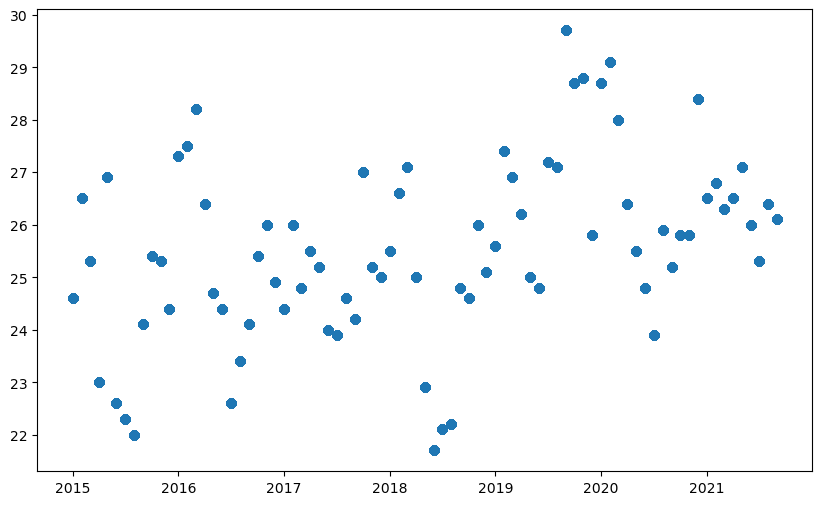

In [43]:
df = df_combinado


df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')

x=df['Fecha']
y=df['Temperatura Máxima']

cantidad_datos_x = len(df['Fecha'])
cantidad_datos_y = len(df['Temperatura Máxima'])

print("Cantidad de datos en x:", cantidad_datos_x)
print("Cantidad de datos en y:", cantidad_datos_y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.show()


Propuesta de la solución

Realización de la solución

Conclusiones y métricas de la solución